# Recreating the k Nearest Neighbor Algorithm
## Objective: 
To re-create the 4 steps of k-NN algorithm with an ability to change k and see the graph change

## Steps:
1. Bring in labeled 2D data

| Feature 1 | Feature 2 | Label |
|----------|----------|----------|
| Row 1    | Data     | 1      |
| Row 2    | More     | -1      |

2. Each new point will be a vector, using: 
```
import dataclasses from dataclass
@dataclass
class NewPoint:
    x1: float
    x2: float
    new_label: int

    # can def functions here too if needed
```
3. Define a function where you can choose: m points, k nearest neighbors
4. Inside that function create m NewPoints
5. For each point calculate the y_labeled
6. Graph NewPoints in black dot with a ring corresponding to the new_label
7. Create a function that creates a random point, plots in the scatterplot, then outputs which label its associated to
8. Figure out how to add an overlay to the graph according to k-NN


Training Points: [Point(x1=np.float64(0.7738181480725147), x2=np.float64(1.7048733327717802), y=np.int64(1)), Point(x1=np.float64(1.5617686084086029), x2=np.float64(2.612767663489286), y=np.int64(1)), Point(x1=np.float64(1.1166994585569527), x2=np.float64(4.273498727225094), y=np.int64(0)), Point(x1=np.float64(2.766186929482647), x2=np.float64(4.171709493984618), y=np.int64(0)), Point(x1=np.float64(1.7344800353938457), x2=np.float64(1.97405261866589), y=np.int64(1)), Point(x1=np.float64(3.0781147656037913), x2=np.float64(-0.306306202808484), y=np.int64(1)), Point(x1=np.float64(4.4732315927700395), x2=np.float64(-1.3590495193290522), y=np.int64(1)), Point(x1=np.float64(0.7857504196312242), x2=np.float64(2.227845047795851), y=np.int64(1)), Point(x1=np.float64(1.7794482302933938), x2=np.float64(1.3678837658911478), y=np.int64(1)), Point(x1=np.float64(-1.4844332463287706), x2=np.float64(6.099015641739511), y=np.int64(0)), Point(x1=np.float64(1.5325341499265464), x2=np.float64(4.11173222783

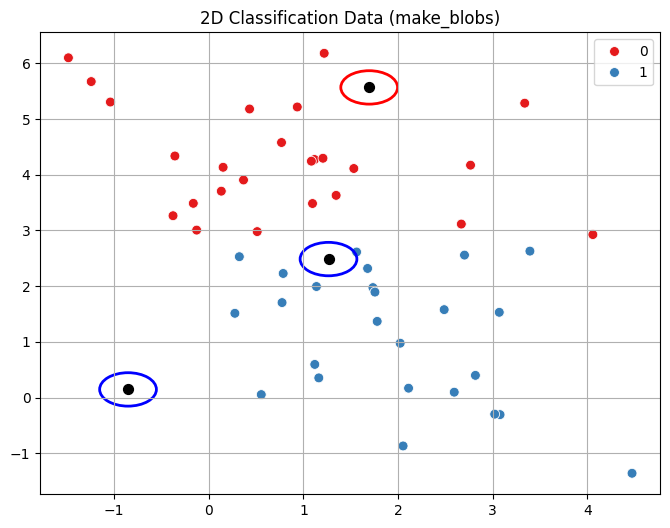

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass
import random
import numpy as np

NUMBER_OF_TRAINING_POINTS = 50
NEW_POINTS = 3
k_NEAREST = 3 #ensure odd
NOISE = 0.5

@dataclass
class Point:
    x1: float
    x2: float
    y: int

    def label_y_by_k_NN(self, k, points: list["Point"]):
        '''
        1. Find k-NN Points (k=odd) by calculating distance to every point
        2. Find label by majority vote of y labels from k-NN
        3. Set self.y = label
        '''
        @dataclass
        class TrainingPointAndDistance:
            point: "Point"
            distance: float

        #Step 1
        training_point_and_distance_list = []
        for point in points:
            distance = ((self.x1-point.x1)**2 + (self.x2-point.x2)**2)**(1/2)
            training_point_and_distance_list.append(TrainingPointAndDistance(point, distance))
        
        #Step 2
        k_nearest_points = sorted(training_point_and_distance_list, key=lambda p: p.distance)[:k]
        label_zero_count = 0
        for i in k_nearest_points:
            if i.point.y == 0:
                label_zero_count += 1
        
        #Step 3
        if label_zero_count > k/2:
            self.y = 0
        else:
            self.y = 1         

def define_new_points(m):
    new_points = []
    #creates m random points
    for point in range(m):
        x1 = random.uniform(-1, 4)
        x2 = random.uniform(0, 6)
        new_points.append(Point(x1, x2, None))
    return new_points

def main():
    # Get Dataset
    X, y = make_blobs(n_samples=NUMBER_OF_TRAINING_POINTS, centers=2, n_features=2, random_state=0)
    X += np.random.normal(0, NOISE, X.shape)

    # Make Labeled Points
    points = [Point(x1=xi[0], x2=xi[1], y=yi) for xi, yi in zip(X, y)]
    print(f"Training Points: {points}")

    # Make a plot
    plt.figure(figsize=(8, 6))
    x1_vals = [p.x1 for p in points]
    x2_vals = [p.x2 for p in points]
    labels = [p.y for p in points]
    sns.scatterplot(x=x1_vals, y=x2_vals, hue=labels, palette="Set1", s=50)
    plt.title("2D Classification Data (make_blobs)")
    plt.grid(True)

    # Plot Unlabled Points
    new_points = define_new_points(NEW_POINTS)
    new_x1_vals = [new_point.x1 for new_point in new_points]
    new_x2_vals = [new_point.x2 for new_point in new_points]
    plt.scatter(new_x1_vals, new_x2_vals, color='black', s=50)

    # Find out NN for the New Points
    for point in new_points:
        point.label_y_by_k_NN(k_NEAREST, points)
        # Color the new point accoerding to its new label
        if point.y == 0:
            ring = plt.Circle((point.x1, point.x2), radius=0.3, color='red', fill=False, linewidth=2)
            plt.gca().add_patch(ring)
        else:
            ring = plt.Circle((point.x1, point.x2), radius=0.3, color='blue', fill=False, linewidth=2)
            plt.gca().add_patch(ring)

    # Show plot
    plt.show()

if __name__ == "__main__":
    main()

# Figure out overlay for k-NN



